<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/sns2018_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

%matplotlib inline

In [3]:
sns2018_1 = pd.read_csv('/content/drive/My Drive/weatherdata/sns2018_1.csv')

In [4]:
sns2018_1.head()

,Unnamed: 0,sns2018_1.date,sns2018_1.big_cat,sns2018_1.sm_cat,sns2018_1.cnt
0,1,20180101,뷰티,기능성 링클케어 화장품,12.154295
1,2,20180101,뷰티,기능성 모공관리 화장품,36.000828
2,3,20180101,뷰티,기능성 아이케어 화장품,0.895782
3,4,20180101,뷰티,기능성 영양보습 화장품,14.868175
4,5,20180101,뷰티,기능성 트러블케어 화장품,48.819391


In [7]:
sns2018_2 = pd.read_csv("/content/drive/My Drive/weatherdata/sns2018_2.csv")

In [9]:
sns2018_2.head()

,Unnamed: 0,sns2018_2.date,sns2018_2.big_cat,sns2018_2.sm_cat,sns2018_2.cnt
0,1,20180701,뷰티,기능성 링클케어 화장품,12.517029
1,2,20180701,뷰티,기능성 모공관리 화장품,180.965546
2,3,20180701,뷰티,기능성 아이케어 화장품,3.456438
3,4,20180701,뷰티,기능성 영양보습 화장품,2.823056
4,5,20180701,뷰티,기능성 트러블케어 화장품,170.621002


In [10]:
#sns2018_1에서 월 변수 생성
#.date의 자료형을 int에서 str 형으로 바꾼듯?
sns2018_1['month'] = sns2018_1['sns2018_1.date'].apply(lambda x : pd.to_datetime(str(x), format = '%Y%m%d'))
#month만 추출
sns2018_1['month'] = sns2018_1['month'].dt.month

In [13]:
sns2018_1.head()

,Unnamed: 0,sns2018_1.date,sns2018_1.big_cat,sns2018_1.sm_cat,sns2018_1.cnt,month
0,1,20180101,뷰티,기능성 링클케어 화장품,12.154295,1
1,2,20180101,뷰티,기능성 모공관리 화장품,36.000828,1
2,3,20180101,뷰티,기능성 아이케어 화장품,0.895782,1
3,4,20180101,뷰티,기능성 영양보습 화장품,14.868175,1
4,5,20180101,뷰티,기능성 트러블케어 화장품,48.819391,1


In [17]:
sns2018_1.shape

(69323, 6)

In [14]:
sns2018_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69323 entries, 0 to 69322
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         69323 non-null  int64  
 1   sns2018_1.date     69323 non-null  int64  
 2   sns2018_1.big_cat  69323 non-null  object 
 3   sns2018_1.sm_cat   69323 non-null  object 
 4   sns2018_1.cnt      69323 non-null  float64
 5   month              69323 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.2+ MB


In [35]:
#cnt(검색량) big_cat > sm_cat > month 별로 합침(월별 검색량)
monthlycnt_sum=sns2018_1[['sns2018_1.big_cat','sns2018_1.sm_cat','sns2018_1.cnt','month']].groupby(['sns2018_1.big_cat','sns2018_1.sm_cat','month'],as_index=False).sum()
monthlycnt_sum.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
0,냉난방가전,가스온수기,1,27.218786
1,냉난방가전,가스온수기,2,17.779753
2,냉난방가전,가스온수기,3,21.606308
3,냉난방가전,가스온수기,4,23.956713
4,냉난방가전,가스온수기,5,26.981895


In [92]:
monthlycnt_sum[monthlycnt_sum['month'] == 6].head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
5,냉난방가전,가스온수기,6,19.500924
11,냉난방가전,가열식 가습기,6,2.653804
17,냉난방가전,공기정화 용품,6,48.338610
23,냉난방가전,공기청정기,6,1713.407052
29,냉난방가전,난방용 열풍기,6,1.310309


## 1

In [ ]:
df = monthlycnt_sum[['sns2018_1.sm_cat','sns2018_1.cnt','month']]
df.head()

In [ ]:
#그래프를 볼 수 없음
"""
ind = np.arange(monthlycnt_sum.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (100,18))
sns.barplot(x = 'sns2018_1.sm_cat', y = 'sns2018_1.cnt', hue = 'month', data = df)
#ax,set_yticks(ind)
#ax.set_ytickslabels(sns2018_1.column_name.values, rotation = 'horizontal')
plt.show()
"""

In [45]:
#.big_cat별로 쪼갤거임
monthlycnt_sum.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
0,냉난방가전,가스온수기,1,27.218786
1,냉난방가전,가스온수기,2,17.779753
2,냉난방가전,가스온수기,3,21.606308
3,냉난방가전,가스온수기,4,23.956713
4,냉난방가전,가스온수기,5,26.981895


In [ ]:
#sns.barplot(x = 'sns2018_1.sm_cat', y = 'sns2018_1.cnt', hue = 'month', data = df)

In [70]:
type(monthlycnt_sum['sns2018_1.big_cat'])

pandas.core.series.Series

In [73]:
monthlycnt_sum[monthlycnt_sum['sns2018_1.big_cat'] == '냉난방가전'].head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
0,냉난방가전,가스온수기,1,27.218786
1,냉난방가전,가스온수기,2,17.779753
2,냉난방가전,가스온수기,3,21.606308
3,냉난방가전,가스온수기,4,23.956713
4,냉난방가전,가스온수기,5,26.981895


In [78]:
monthlycnt_sum['sns2018_1.big_cat'].unique()

array(['냉난방가전', '뷰티', '식품'], dtype=object)

In [93]:
sns18bigcat1 = monthlycnt_sum[monthlycnt_sum['sns2018_1.big_cat'] == "냉난방가전"]
sns18bigcat1.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
0,냉난방가전,가스온수기,1,27.218786
1,냉난방가전,가스온수기,2,17.779753
2,냉난방가전,가스온수기,3,21.606308
3,냉난방가전,가스온수기,4,23.956713
4,냉난방가전,가스온수기,5,26.981895


In [95]:
sns18bigcat1['month'].unique()

array([1, 2, 3, 4, 5, 6])

In [96]:
sns18bigcat2 = monthlycnt_sum[monthlycnt_sum['sns2018_1.big_cat'] == "뷰티"]
sns18bigcat2.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
240,뷰티,기능성 링클케어 화장품,1,614.697815
241,뷰티,기능성 링클케어 화장품,2,512.759400
242,뷰티,기능성 링클케어 화장품,3,536.172718
243,뷰티,기능성 링클케어 화장품,4,499.257357
244,뷰티,기능성 링클케어 화장품,5,452.458058


In [97]:
sns18bigcat3 = monthlycnt_sum[monthlycnt_sum['sns2018_1.big_cat'] == "식품"]
sns18bigcat3.head()

,sns2018_1.big_cat,sns2018_1.sm_cat,month,sns2018_1.cnt
1026,식품,가공란,1,44.120570
1027,식품,가공란,2,46.673708
1028,식품,가공란,3,56.829172
1029,식품,가공란,4,59.955087
1030,식품,가공란,5,71.385117


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_

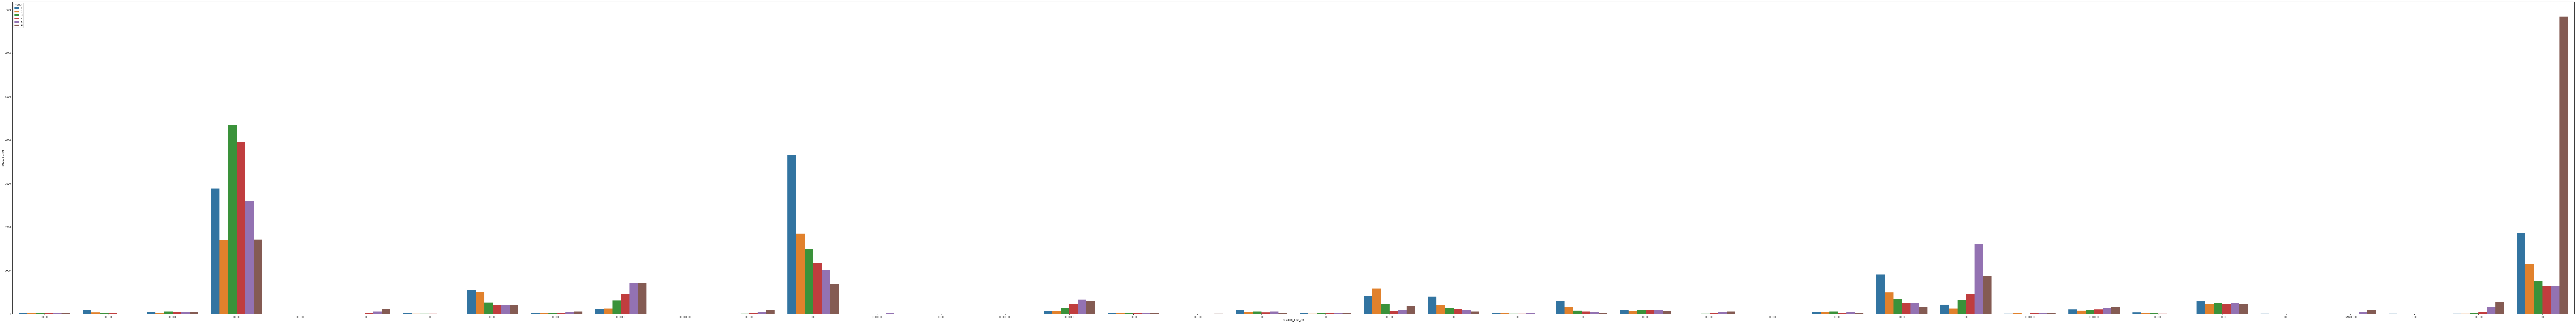

In [100]:
ind = np.arange(sns18bigcat1.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (200,25))
sns.barplot(x = 'sns2018_1.sm_cat', y = 'sns2018_1.cnt', hue = 'month', data = sns18bigcat1)
#ax,set_yticks(ind)
#ax.set_ytickslabels(sns2018_1.column_name.values, rotation = 'horizontal')
plt.show()

In [74]:
#반복문으로 만들어서 어떻게든 해낼거임
for x in monthlycnt_sum['sns2018_1.big_cat'].unique() :
  print(x)
  if monthlycnt_sum['sns2018_1.big_cat'] == x :
    monthlycnt_sum[monthlycnt_sum['sns2018_1.big_cat'] == x].head()


ValueError: ignored

## adf

In [ ]:
sns2018_1.columns

Index(['Unnamed: 0', 'sns2018_1.date', 'sns2018_1.big_cat', 'sns2018_1.sm_cat',
       'sns2018_1.cnt'],
      dtype='object')

In [ ]:
sns2018_1[['sns2018_1.cnt','sns2018_1.date', 'sns2018_1.big_cat','sns2018_1.sm_cat']].groupby(['sns2018_1.big_cat', 'sns2018_1.date'], as_index = True).count()

sns2018_1.cnt  sns2018_1.sm_cat
sns2018_1.big_cat sns2018_1.date                                 
냉난방가전             20180101                   40                40
                  20180102                   40                40
                  20180103                   40                40
                  20180104                   40                40
                  20180105                   40                40
...                                         ...               ...
식품                20180626                  212               212
                  20180627                  212               212
                  20180628                  212               212
                  20180629                  212               212
                  20180630                  212               212

[543 rows x 2 columns]

In [ ]:
sns2018_1[['sns2018_1.cnt','sns2018_1.date', 'sns2018_1.sm_cat']].groupby(['sns2018_1.sm_cat', 'sns2018_1.date'], as_index = True).count()

sns2018_1.cnt
sns2018_1.sm_cat sns2018_1.date               
가공란              20180101                    1
                 20180102                    1
                 20180103                    1
                 20180104                    1
                 20180105                    1
...                                        ...
히터               20180626                    1
                 20180627                    1
                 20180628                    1
                 20180629                    1
                 20180630                    1

[69323 rows x 1 columns]

* 월 단위, 주 단위로 쪼개기
* 기간 단위 별로 검색량 합치기
* 판매량을 예측하기 위해선, 테스트set이 필요하지 않은지? 학습 모델링을 할 필요는 없는지?
    * 날씨 예측을 해볼 수 있는지? (우리가 2018-2019 에 한 날씨 분석(모형적합)과 2021 날씨가 유사한지 (테스트셋)
    * 날씨와 소비 간의 연관성이 큰 지 -> 이걸 어떻게 보지?


In [ ]:
sns2018_1

In [ ]:
#우선 sns2018_1.date 에서 월만 추출한 뒤
#월별 big_cat 구매량을 보고
#막대 그래프로 구매 건수 뛰는 순간을 살펴보자

## 시도
해보고 싶은 것들

In [ ]:
#군집
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
#X에 해당하는 값이 뭐야? 
kmeans.fit(sns2018_1['sns2018_1.cnt']) 
#sns2018_1.cnt를 2D array로 바꾸어야 하는 듯
#왜 유방암 데이터는 2d array였을까 어떤 값들로 2d array였는지 알면 데이터를 2d array로 변환할 수 있지 않겠어?

ValueError: ignored